In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
data=pd.read_csv('Bond_data.csv')
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued
0,Bond Fund,3.225440e+11,2.810605e+09,114.7596,114.7596,114.7596,12/30/2022
1,Bond Fund,3.222010e+11,2.808387e+09,114.7283,114.7283,114.7283,12/29/2022
2,Bond Fund,3.222400e+11,2.809500e+09,114.6966,114.6966,114.6966,12/28/2022
3,Bond Fund,3.210100e+11,2.802004e+09,114.5646,114.5646,114.5646,12/27/2022
4,Bond Fund,3.192990e+11,2.790119e+09,114.4393,114.4393,114.4393,12/23/2022


In [52]:
data.shape

(771, 7)

In [53]:
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit,Date Valued
0,Bond Fund,3.225440e+11,2.810605e+09,114.7596,114.7596,114.7596,12/30/2022
1,Bond Fund,3.222010e+11,2.808387e+09,114.7283,114.7283,114.7283,12/29/2022
2,Bond Fund,3.222400e+11,2.809500e+09,114.6966,114.6966,114.6966,12/28/2022
3,Bond Fund,3.210100e+11,2.802004e+09,114.5646,114.5646,114.5646,12/27/2022
4,Bond Fund,3.192990e+11,2.790119e+09,114.4393,114.4393,114.4393,12/23/2022


In [54]:
data['Net Asset Value'] = np.sqrt(data['Net Asset Value'])
data['Outstanding Number of Units'] = np.sqrt(data['Outstanding Number of Units'])

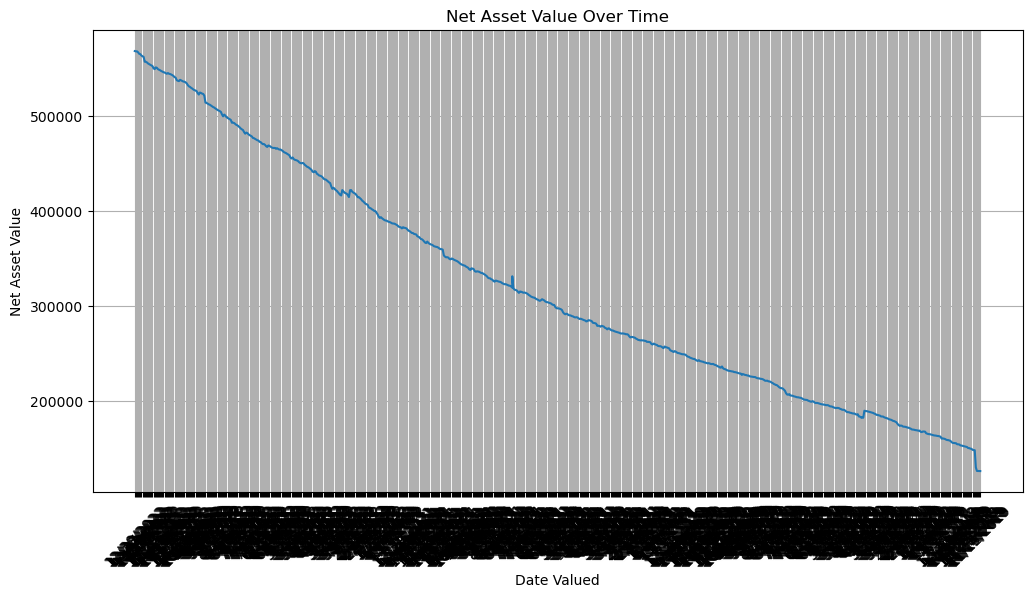

In [55]:
# Time series plot of NAV
plt.figure(figsize=(12, 6))
plt.plot(data['Date Valued'], data['Net Asset Value'])
plt.xlabel('Date Valued')
plt.ylabel('Net Asset Value')
plt.title('Net Asset Value Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [56]:
data.set_index('Date Valued', inplace=True)

In [57]:
data.head()

,Scheme Name,Net Asset Value,Outstanding Number of Units,Nav Per Unit,Sale Price per Unit,Repurchase Price/Unit
Date Valued,,,,,,
12/30/2022,Bond Fund,567929.573099,53015.139866,114.7596,114.7596,114.7596
12/29/2022,Bond Fund,567627.518713,52994.213722,114.7283,114.7283,114.7283
12/28/2022,Bond Fund,567661.871187,53004.713234,114.6966,114.6966,114.6966
12/27/2022,Bond Fund,566577.443956,52933.957957,114.5646,114.5646,114.5646
12/23/2022,Bond Fund,565065.482931,52821.579151,114.4393,114.4393,114.4393


In [58]:
df=data.filter(['Net Asset Value'])
dataset=df.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

617

In [59]:
df.head()

,Net Asset Value
Date Valued,
12/30/2022,567929.573099
12/29/2022,567627.518713
12/28/2022,567661.871187
12/27/2022,566577.443956
12/23/2022,565065.482931


In [60]:
## scale the data
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[1.00000000e+00],
       [9.99315072e-01],
       [9.99392969e-01],
       [9.96933960e-01],
       [9.93505492e-01],
       [9.92692617e-01],
       [9.89307116e-01],
       [9.87558585e-01],
       [9.86279916e-01],
       [9.74687147e-01],
       [9.74418318e-01],
       [9.72995828e-01],
       [9.70454587e-01],
       [9.68888506e-01],
       [9.67390113e-01],
       [9.65576139e-01],
       [9.64303767e-01],
       [9.59021919e-01],
       [9.56929342e-01],
       [9.61115107e-01],
       [9.60176079e-01],
       [9.56859116e-01],
       [9.55517860e-01],
       [9.54204135e-01],
       [9.52381240e-01],
       [9.51223969e-01],
       [9.49604465e-01],
       [9.49005958e-01],
       [9.47329428e-01],
       [9.45979896e-01],
       [9.47679066e-01],
       [9.46046575e-01],
       [9.45283728e-01],
       [9.44178221e-01],
       [9.42716596e-01],
       [9.40753200e-01],
       [9.38136738e-01],
       [9.36680499e-01],
       [9.30641929e-01],
       [9.29311915e-01],


In [61]:
#create the training set
#create the scaled training set
train_data=scaled_data[0:training_data_len, :]
print(train_data[:5])

[[1.        ]
 [0.99931507]
 [0.99939297]
 [0.99693396]
 [0.99350549]]


In [62]:
#split the data into x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)

[array([1.        , 0.99931507, 0.99939297, 0.99693396, 0.99350549,
       0.99269262, 0.98930712, 0.98755858, 0.98627992, 0.97468715,
       0.97441832, 0.97299583, 0.97045459, 0.96888851, 0.96739011,
       0.96557614, 0.96430377, 0.95902192, 0.95692934, 0.96111511,
       0.96017608, 0.95685912, 0.95551786, 0.95420414, 0.95238124,
       0.95122397, 0.94960446, 0.94900596, 0.94732943, 0.9459799 ,
       0.94767907, 0.94604657, 0.94528373, 0.94417822, 0.9427166 ,
       0.9407532 , 0.93813674, 0.9366805 , 0.93064193, 0.92931192,
       0.92844346, 0.93155942, 0.9302072 , 0.92867806, 0.92738187,
       0.92715336, 0.92549749, 0.92330241, 0.9191474 , 0.91609113,
       0.91473861, 0.91249388, 0.91085851, 0.90863228, 0.90697226,
       0.90604233, 0.90461589, 0.89984799, 0.8964858 , 0.90131258])]
[0.9001748123951923]


In [63]:
#convert the x_train and y_train into numpy array
x_train,y_train=np.array(x_train),np.array(y_train)

In [64]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(557, 60, 1)

In [65]:
#buld LSTM model
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [66]:
#complite the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [67]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
557/557 [==============================] - 27s 39ms/step - loss: 0.0023
Epoch 2/2
557/557 [==============================] - 22s 40ms/step - loss: 9.3898e-05


In [68]:
# #create the testing dataset
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [69]:
#convert the data to numpy array
x_test=np.array(x_test)

In [70]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(154, 60, 1)

In [71]:
#get the model prediction
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
predictions

5/5 [==============================] - 1s 31ms/step


array([[201431.45],
       [201113.03],
       [200790.61],
       [200462.77],
       [200142.47],
       [199830.55],
       [199523.28],
       [199215.81],
       [198909.62],
       [198606.23],
       [198309.61],
       [198023.64],
       [197742.62],
       [197473.4 ],
       [197219.45],
       [196967.61],
       [196706.95],
       [196443.8 ],
       [196178.58],
       [195901.78],
       [195613.64],
       [195313.25],
       [195018.89],
       [194738.22],
       [194470.69],
       [194201.95],
       [193929.  ],
       [193642.53],
       [193355.52],
       [193067.7 ],
       [192763.14],
       [192425.78],
       [192064.66],
       [191694.77],
       [191316.6 ],
       [190938.95],
       [190561.28],
       [190190.12],
       [189836.05],
       [189485.61],
       [189135.98],
       [188808.56],
       [188444.9 ],
       [188056.05],
       [187634.6 ],
       [187207.2 ],
       [186776.39],
       [186356.4 ],
       [186158.1 ],
       [186138.62],


In [72]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate R-squared (R2)
r2 = r2_score(y_test, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
# print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 39390092.14713894
R-squared (R2): 0.8612175147287803
Mean Absolute Error (MAE): 4756.446598884996
Root Mean Squared Error (RMSE): 6276.152654862606


In [73]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

C:\Users\roma\AppData\Local\Temp\ipykernel_8516\3983594056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


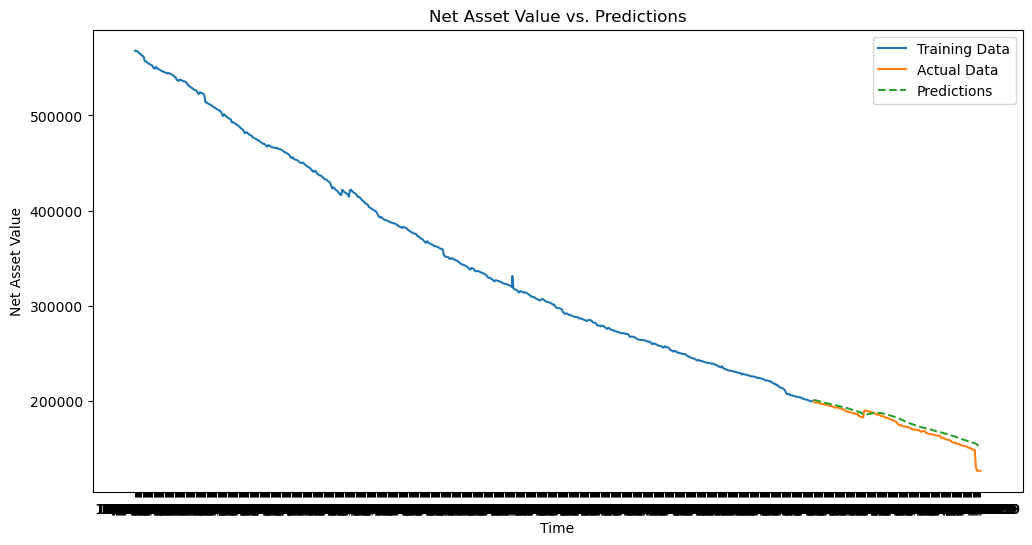

In [74]:
plt.figure(figsize=(12, 6))
plt.title('Net Asset Value vs. Predictions')
plt.xlabel('Time')
plt.ylabel('Net Asset Value')
plt.plot(train['Net Asset Value'], label='Training Data')
plt.plot(valid['Net Asset Value'], label='Actual Data')
plt.plot(valid['Predictions'], label='Predictions', linestyle='--')
plt.legend()
plt.show()

In [75]:
train

,Net Asset Value
Date Valued,
12/30/2022,567929.573099
12/29/2022,567627.518713
12/28/2022,567661.871187
12/27/2022,566577.443956
12/23/2022,565065.482931
...,...
7/5/2020,200917.258310
7/2/2020,200461.507592
7/1/2020,200013.267540


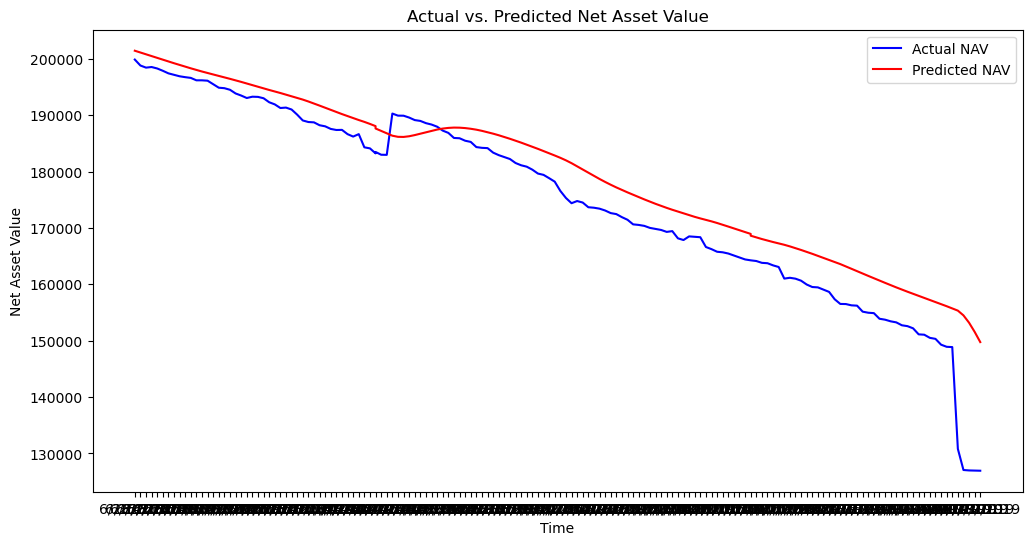

In [76]:
import matplotlib.pyplot as plt

# Assuming 'valid' is a DataFrame containing 'Net Asset Value' and 'Predictions' columns
plt.figure(figsize=(12, 6))
plt.title('Actual vs. Predicted Net Asset Value')
plt.xlabel('Time')
plt.ylabel('Net Asset Value')

# Plot the actual 'Net Asset Value' in blue
plt.plot(valid['Net Asset Value'], label='Actual NAV', color='blue')

# Plot the 'Predictions' in red
plt.plot(valid['Predictions'], label='Predicted NAV', color='red')

plt.legend()
plt.show()


In [77]:
valid

,Net Asset Value,Predictions
Date Valued,,
6/28/2020,199862.826103,201431.453125
6/25/2020,198807.152834,201113.031250
6/24/2020,198432.550951,200790.609375
6/23/2020,198539.566462,200462.765625
6/22/2020,198281.462036,200142.468750
...,...,...
11/19/2019,130803.193298,155327.125000
11/17/2019,127055.969706,154484.015625
11/14/2019,126978.539758,153183.250000


In [78]:
from sklearn.ensemble import RandomForestRegressor
features = ['Outstanding Number of Units', 'Nav Per Unit', 'Sale Price per Unit', 'Repurchase Price/Unit']
target = 'Net Asset Value'

X = data[features]
y = data[target]

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X, y)

# Make predictions using the Random Forest model
rf_predictions = rf_model.predict(X)


In [79]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate predictions using the Random Forest model
rf_predictions = rf_model.predict(X)

# Calculate RMSE
rmse = mean_squared_error(y, rf_predictions, squared=False)

# Calculate MSE
mse = mean_squared_error(y, rf_predictions)

# Calculate R-squared (R2)
r2 = r2_score(y, rf_predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 293.74828741720376
Mean Squared Error (MSE): 86288.05636054015
R-squared (R2): 0.9999940130128202


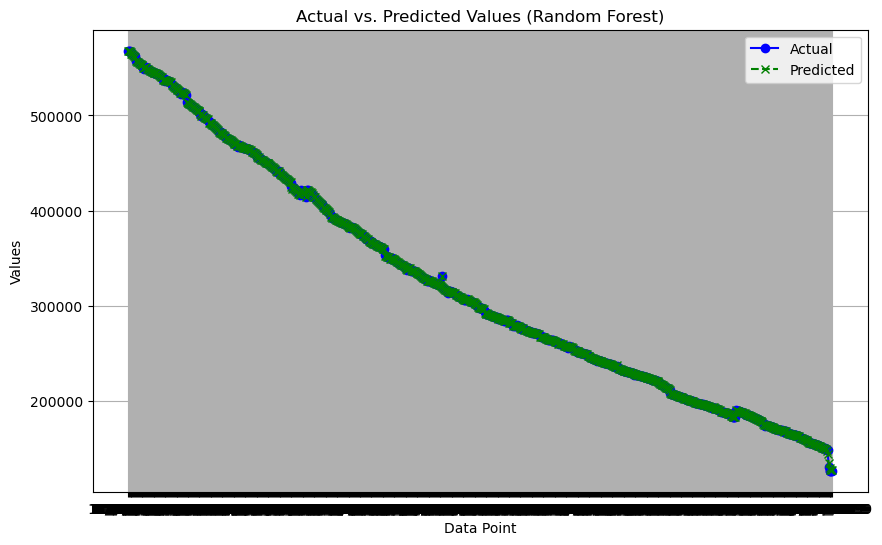

In [80]:

rf_predictions = rf_model.predict(X)

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y, 'Predicted': rf_predictions})

# Plot actual and predicted values on the same axis
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['Actual'], label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(results.index, results['Predicted'], label='Predicted', marker='x', linestyle='--', color='green')
plt.xlabel('Data Point')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.grid(True)
plt.legend()
plt.show()
